# Sample Savings Transactions Processing and Loading
Below is an example of how transactions from my savings account are transformed into a format that
can be loaded into the "spend_save" database, then loaded into the database. May 2023 transactions are loaded
and processed in this example. Due to the sensitive nature of this data, any amounts have been changed
to a random number and any sensitive material (such as bank account numbers) have been removed. However,
this data still closely resembles real transactions.

This example will show the input transactions CSV file, the output DataFrames generated via the "savings_file_cleanup" function, and how the data is loaded into the database using the "to_spend_save" function. To see the details of the functions, view [transactions_processing_functions](transactions_processing_functions)
and navigate to the desired function.

## Input
Input file in the form of CSV containing all May 2023 savings account transactions.

In [1]:
# Import function and needed packages
import pandas as pd
from transactions_processing_functions import savings_file_cleanup, to_spend_save

In [21]:
# Raw input file extracted bank website
input_csv = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\Personal Finance Database\bank data\saving_transactions_may2023.CSV"
pd.read_csv(input_csv, encoding='unicode_escape', index_col=False)

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,CREDIT,5/29/2023,Online Transfer from CHK ...0000 transaction#:...,527.00,ACCT_XFER,12345,NaN
1,CREDIT,5/25/2023,INTEREST PAYMENT,0.02,MISC_CREDIT,54321,NaN
2,CREDIT,5/10/2023,Online Transfer from ...CHK 0000 transaction#:...,589.00,ACCT_XFER,23456,NaN


## Processing
Processing the input CSV file using savings_file_cleanup. The function takes a CSV file as an argument and produces two results: "savings_df" containing the transactions that were able to be automatically processed with the function, and "savings_review_df" which contains transactions needing manual review. The "savings_review_df" is printed by the function to show all transactions needing review.

In [7]:
# Process the input CSV file using savings_file_cleanup
savings_df, savings_review_df = savings_file_cleanup(input_csv)

Transactions successfully transformed.The following transactions need to be reviewed.Once values have been assigned to transaction_type_id and category_id (or a null category_id),use to_spend_save() to update database.
Empty DataFrame
Columns: [account_id, transaction_type_id, category_id, short_date, transaction_description, transaction_amount]
Index: []


## Output
See the output of "savings_review_df" and "savings_df" below. Since all transactions were able to be processed by the function,
"savings_review_df" in empty. These transactions would be manually assigned a transaction_type_id and category_id (if necessary), then appended back to the "savings_df". In this circuststance, "category_id" is null for all since only purchases are given a category.

In [17]:
# Transactions needing review (if any)
savings_review_df

,account_id,transaction_type_id,category_id,short_date,transaction_description,transaction_amount


In [10]:
# Transactions that were able to be processed automatically
savings_df

,account_id,transaction_type_id,category_id,short_date,transaction_description,transaction_amount
0,3,6,NaN,2023-05-29,online transfer from chk ...0000 transaction#:...,527.00
1,3,9,NaN,2023-05-25,interest payment,0.02
2,3,6,NaN,2023-05-10,online transfer from ...chk 0000 transaction#:...,589.00


In [18]:
# savings_review_df would be updated manually and appended to savings_df for loading into database
savings_df = pd.concat([savings_df, savings_review_df])

### Loading Data into Database

After manually processing any data in "savings_review_df", savings_review_df is appended to "savings_df" and then loaded into the database
using "to_spend_save". This function connects and loads the DataFrame into the "spend_save" database using sqlalchemy. The function's argument include:
1. **df** (pandas.DataFrame): A DataFrame to be loaded into the database
2. **data_source** (str): The name of the data source (savings, checking, or credit card data)
3. **password** (str): The password of the MySQL database server

Once the data has been successfully loaded into the database, a CSV containing the loaded data is saved as backup.

Note: Database server password has been replaced with *** after running the below code.

In [19]:
# Load data into spend_save
to_spend_save(savings_df, "***", "password")

savings data successfully loaded into spend_save MySQL database
csv file saved as savings_2023-06-19.csv


Transactions can now be seen in MySQL database

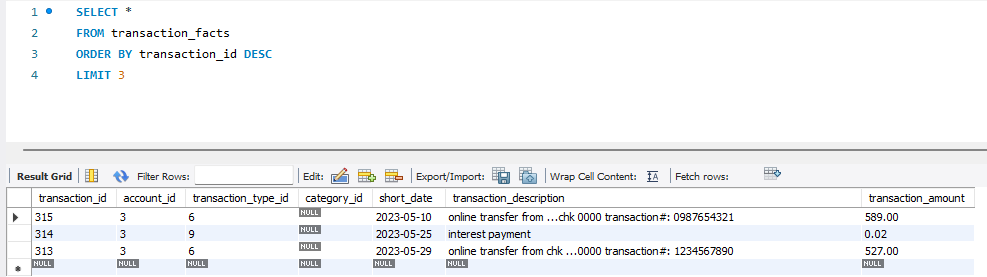